In [1]:
import sys
sys.path.append('..')
%env WORKDIR ~/Documents/weatherpy-work

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

env: WORKDIR=~/Documents/weatherpy-work


In [2]:
from wxdata import stormevents
from wxdata.extras import st_clusters

df = stormevents.tornadoes('1999-01-01 00:00', '2016-12-31 23:59', tz='CST')

/Users/jitang/anaconda/envs/gpdenv/lib/python3.6/multiprocessing/pool.py:44: DtypeWarning: Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  return list(map(*args))


In [3]:
from wxdata.plotting import simple_basemap, sample_colors, LegendBuilder
from wxdata.stormevents import tors
from wxdata.plotting import bottom_right_textbox, bottom_left_textbox

def plot_cluster_day(clusts, bbox, ctable='gist_rainbow', map_hwys=True, 
                     plot_noise=True, legend=None):
    draw = ['coastlines', 'countries', 'states', 'counties']
    if map_hwys:
        draw.append('highways')
    m = simple_basemap(bbox=bbox, proj='merc', draw=draw)

    for clust, color in zip(clusts, sample_colors(len(clusts), ctable)):
        clust_tors = clust.events
        tors.plot_tornadoes(clust_tors, m, color=color, linewidth=2.5, path_shadow=True)
        if legend:
            legend.append(color, clust.describe_tors())

    if plot_noise and clusts.noise:
        tors.plot_tornadoes(clusts.noise.events, m, color='gray', linewidth=2.5, path_shadow=True)
        if legend:
            legend.append('gray', clusts.noise.describe_tors())
            
    if legend:
        legend.plot_legend()
    return m

In [4]:
may03_99 = stormevents.filter_on_date(df, '1999-05-03')
may03_99_clusts = st_clusters(may03_99, eps_km=80, eps_min=60, min_samples=15)

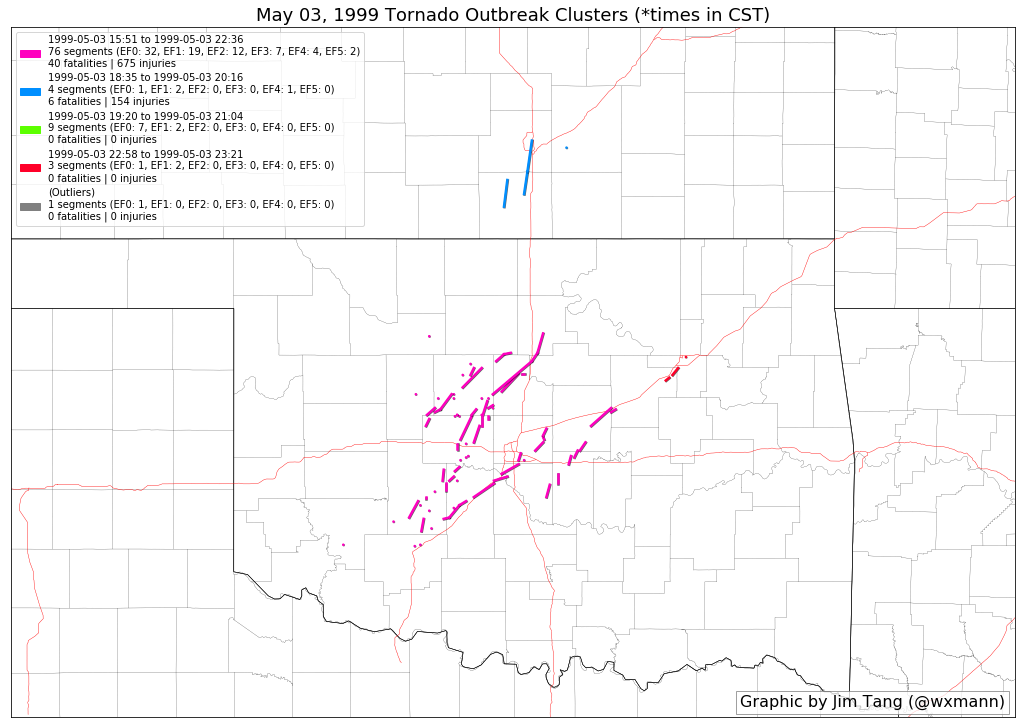

In [8]:
fig = plt.figure(figsize=(18, 18))
bbox = (-102, -93, 33.5, 38.5)
plot_cluster_day(may03_99_clusts, bbox,
                legend=LegendBuilder(loc=2), ctable='gist_rainbow_r')

bottom_right_textbox(plt.gca(), 'Graphic by Jim Tang (@wxmann)')
plt.title('May 03, 1999 Tornado Outbreak Clusters (*times in CST)', fontsize=18)

In [15]:
may23_08 = stormevents.filter_on_date(df, '2008-05-23')
may23_08_clusts = st_clusters(may23_08, eps_km=80, eps_min=60, min_samples=15)

Text(0.5,1,'May 23, 2008 Tornado Outbreak Clusters (*times in CST)')

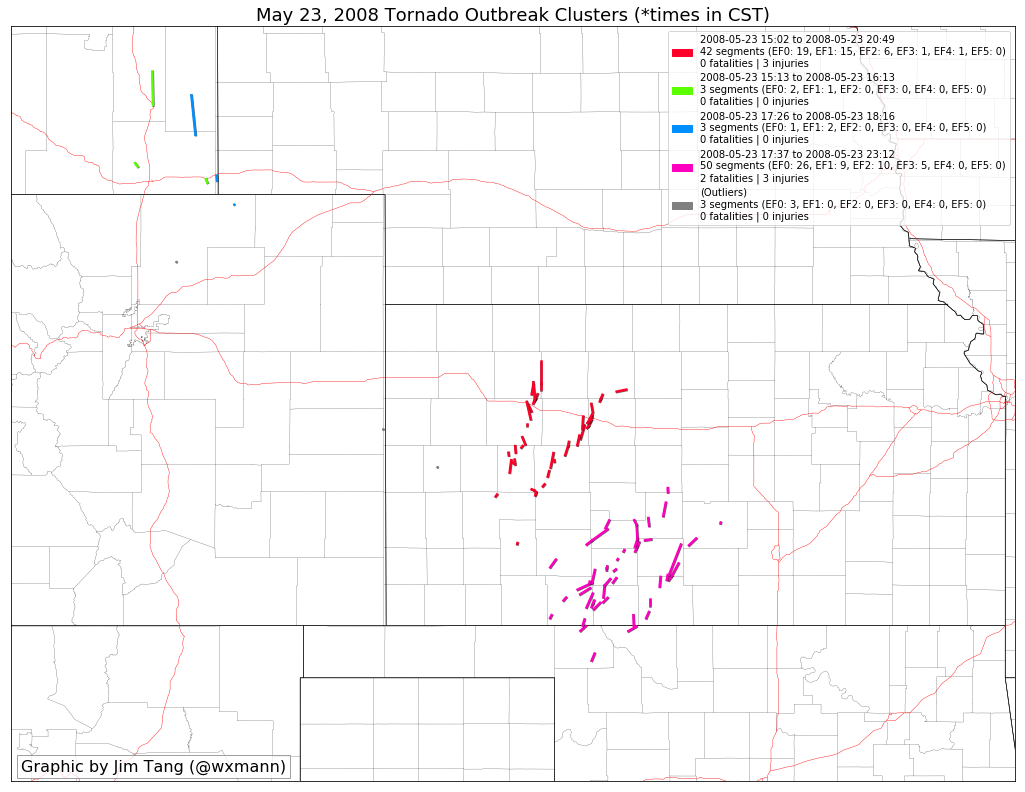

In [16]:
fig = plt.figure(figsize=(18, 18))
srnplains = (-106.5, -94.5, 35.5, 42.5)
plot_cluster_day(may23_08_clusts, srnplains,
                legend=LegendBuilder(loc=1))

bottom_left_textbox(plt.gca(), 'Graphic by Jim Tang (@wxmann)')
plt.title('May 23, 2008 Tornado Outbreak Clusters (*times in CST)', fontsize=18)

In [12]:
apr27_11 = stormevents.filter_on_date(df, '2011-04-27')
apr27_11_clusts = st_clusters(apr27_11, eps_km=80, eps_min=60, min_samples=15)

Text(0.5,1,'Apr 27, 2011 Tornado Outbreak Clusters (*times in CST)')

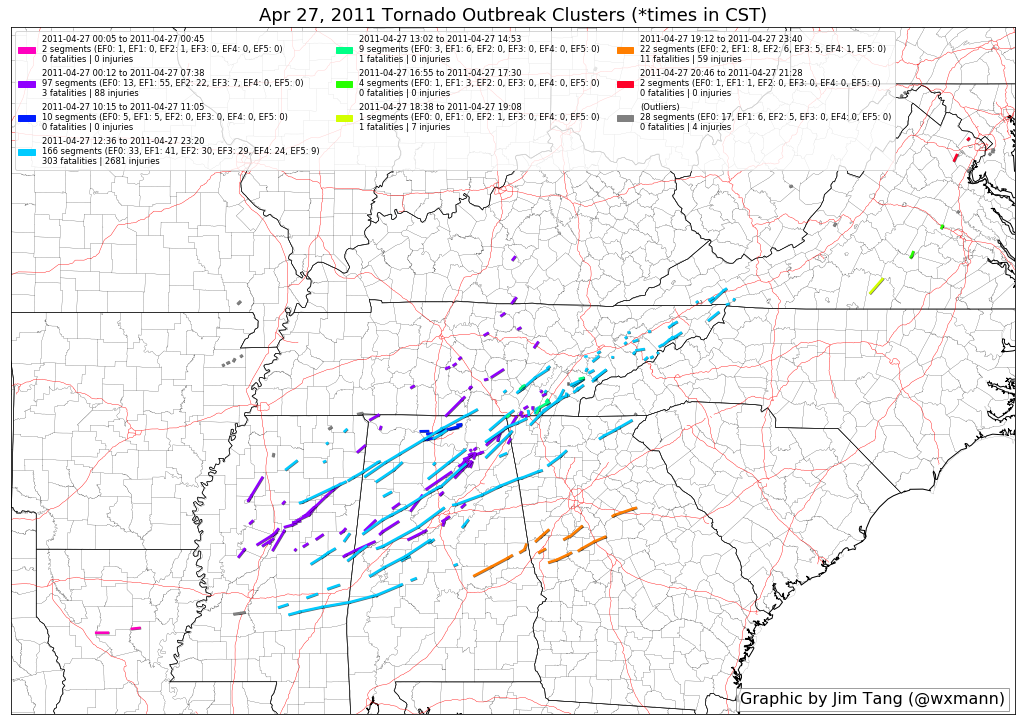

In [13]:
bbox = (-94.5, -76.5, 30.5, 40.5)
fig = plt.figure(figsize=(18, 18))
plot_cluster_day(apr27_11_clusts, bbox, ctable='gist_rainbow_r',
                legend=LegendBuilder(ncol=3, loc=2, fontsize='small'))

bottom_right_textbox(plt.gca(), 'Graphic by Jim Tang (@wxmann)')
plt.title('Apr 27, 2011 Tornado Outbreak Clusters (*times in CST)', fontsize=18)

In [18]:
may24_11 = stormevents.filter_on_date(df, '2011-05-24')
may24_11_clusts = st_clusters(may24_11, eps_km=80, eps_min=60, min_samples=15)

Text(0.5,1,'May 24, 2011 Tornado Outbreak Clusters (*times in CST)')

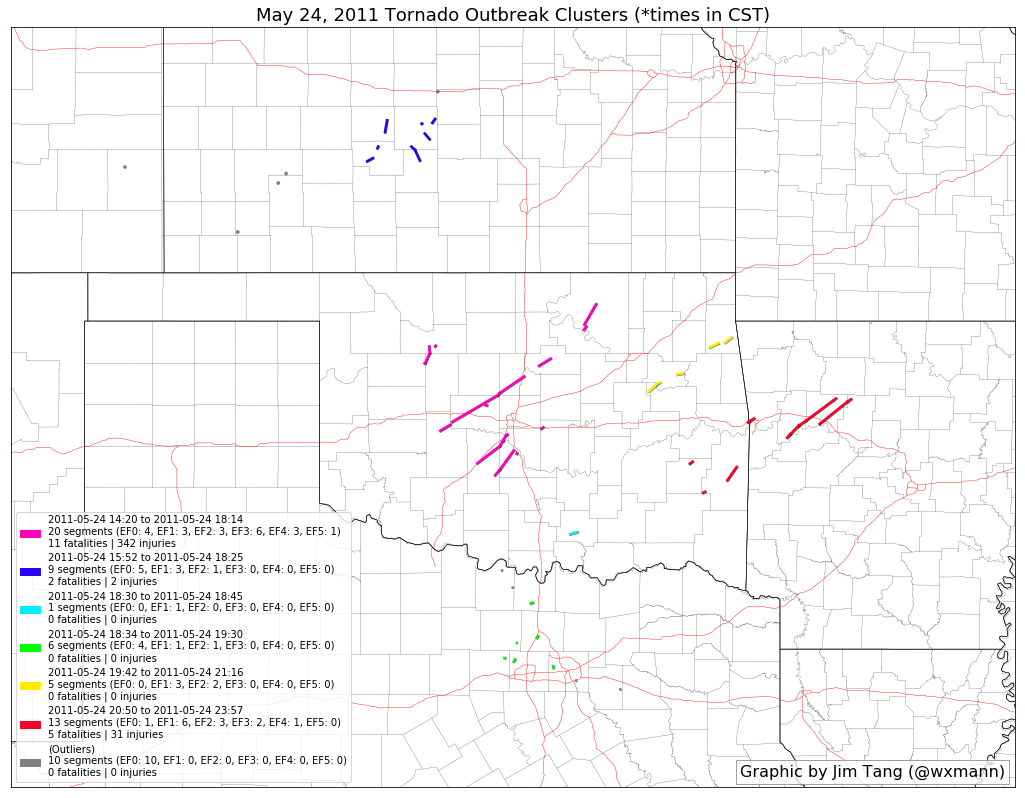

In [19]:
bbox = (-104, -91, 31.5, 39.5)
fig = plt.figure(figsize=(18, 18))
plot_cluster_day(may24_11_clusts, bbox, ctable='gist_rainbow_r', 
                 legend=LegendBuilder(loc=3))

bottom_right_textbox(plt.gca(), 'Graphic by Jim Tang (@wxmann)')
plt.title('May 24, 2011 Tornado Outbreak Clusters (*times in CST)', fontsize=18)

In [35]:
import pandas as pd

feb05_08 = pd.concat([
    stormevents.filter_on_date(df, '2008-02-05'),
    stormevents.filter_on_date(df, '2008-02-06')
])
feb05_08_clusts = st_clusters(feb05_08, eps_km=80, eps_min=60, min_samples=15)

Text(0.5,1,'Feb 05, 2008 Tornado Outbreak Clusters (*times in CST)')

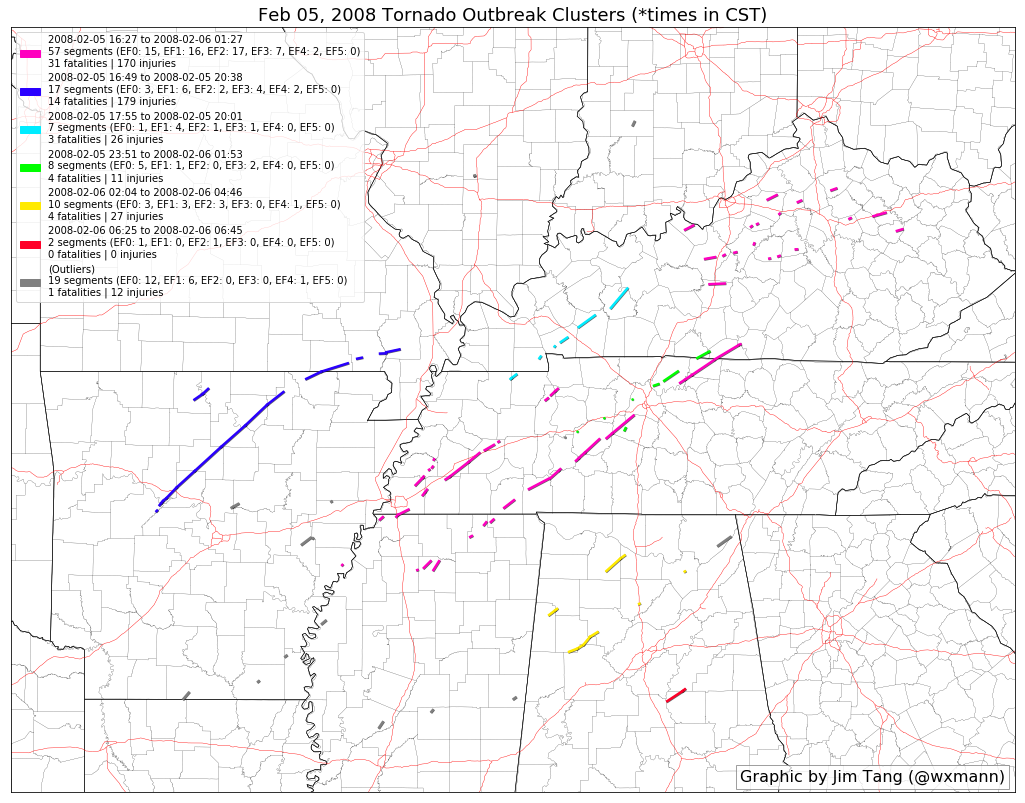

In [36]:
bbox = (-95, -82, 32, 40)
fig = plt.figure(figsize=(18, 18))
basemap = plot_cluster_day(feb05_08_clusts, bbox, ctable='gist_rainbow_r', 
                 legend=LegendBuilder(loc=2))

bottom_right_textbox(plt.gca(), 'Graphic by Jim Tang (@wxmann)')
plt.title('Feb 05, 2008 Tornado Outbreak Clusters (*times in CST)', fontsize=18)

In [24]:
may04_03 = stormevents.filter_on_date(df, '2003-05-04')
may04_03_clusts = st_clusters(may04_03, eps_km=80, eps_min=60, min_samples=15)

Text(0.5,1,'May 04, 2003 Tornado Outbreak Clusters (*times in CST)')

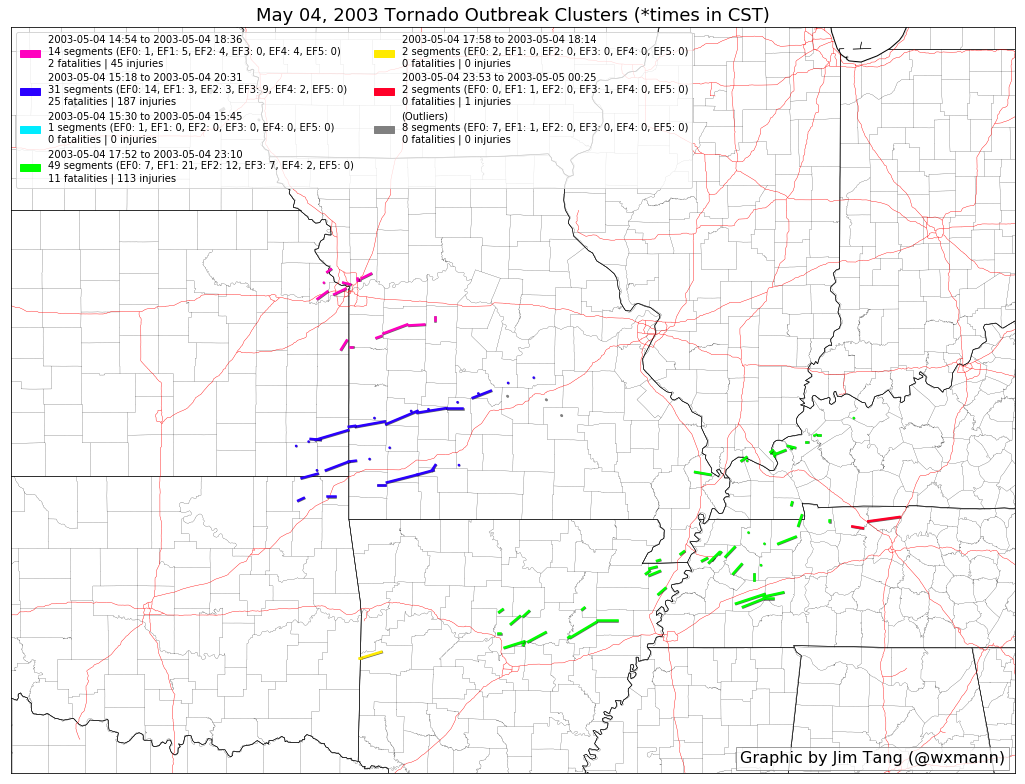

In [25]:
bbox = (-99.5, -85, 33.5, 42)
fig = plt.figure(figsize=(18, 18))
basemap = plot_cluster_day(may04_03_clusts, bbox, ctable='gist_rainbow_r',
                          legend=LegendBuilder(loc=2, ncol=2))

bottom_right_textbox(plt.gca(), 'Graphic by Jim Tang (@wxmann)')
plt.title('May 04, 2003 Tornado Outbreak Clusters (*times in CST)', fontsize=18)

In [27]:
apr14_12 = stormevents.filter_on_date(df, '2012-04-14')
apr14_12_clusts = st_clusters(apr14_12, eps_km=80, eps_min=60, min_samples=15)

Text(0.5,1,'Apr 14, 2012 Tornado Outbreak Clusters (*times in CST)')

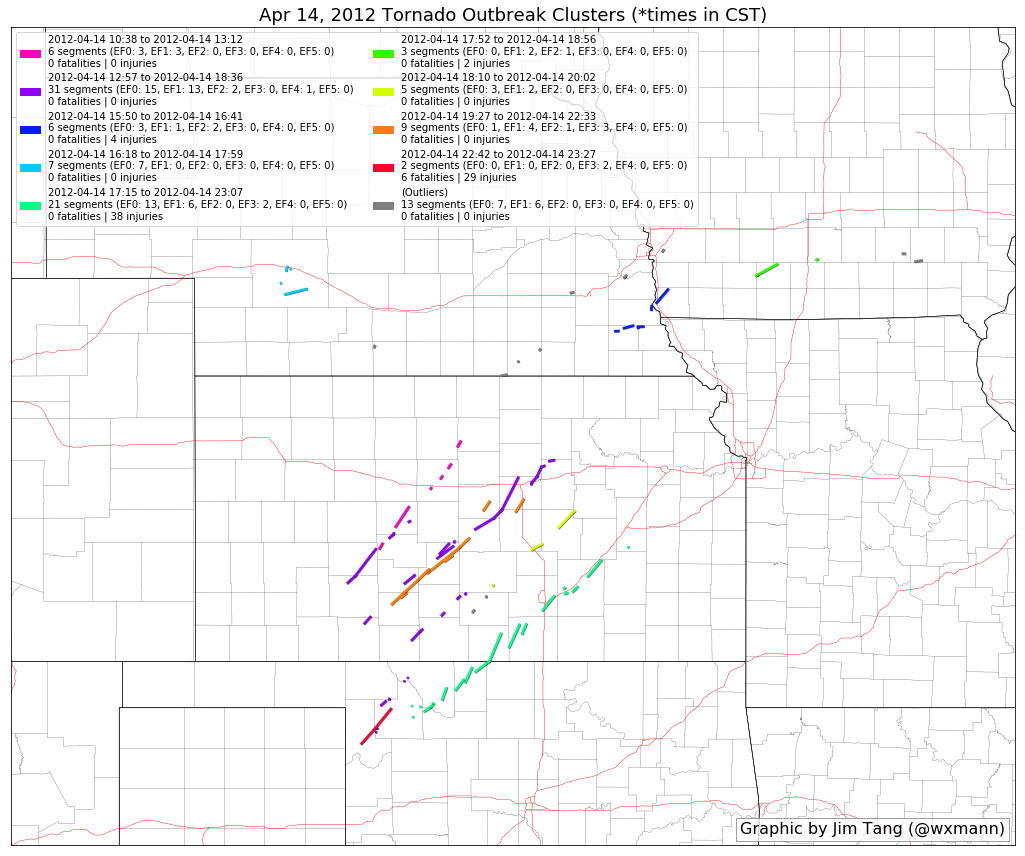

In [28]:
bbox = bbox = (-104.5, -91, 35, 43.5)
fig = plt.figure(figsize=(18, 18))
basemap = plot_cluster_day(apr14_12_clusts, bbox, ctable='gist_rainbow_r',
                          legend=LegendBuilder(loc=2, ncol=2))

bottom_right_textbox(plt.gca(), 'Graphic by Jim Tang (@wxmann)')
plt.title('Apr 14, 2012 Tornado Outbreak Clusters (*times in CST)', fontsize=18)

In [30]:
may04_07 = pd.concat([
    stormevents.filter_on_date(df, '2007-05-04'),
    stormevents.filter_on_date(df, '2007-05-05')
])
may04_07_clusts = st_clusters(may04_07, eps_km=80, eps_min=60, min_samples=15)

Text(0.5,1,'May 04-05, 2007 Tornado Outbreak Clusters (*times in CST)')

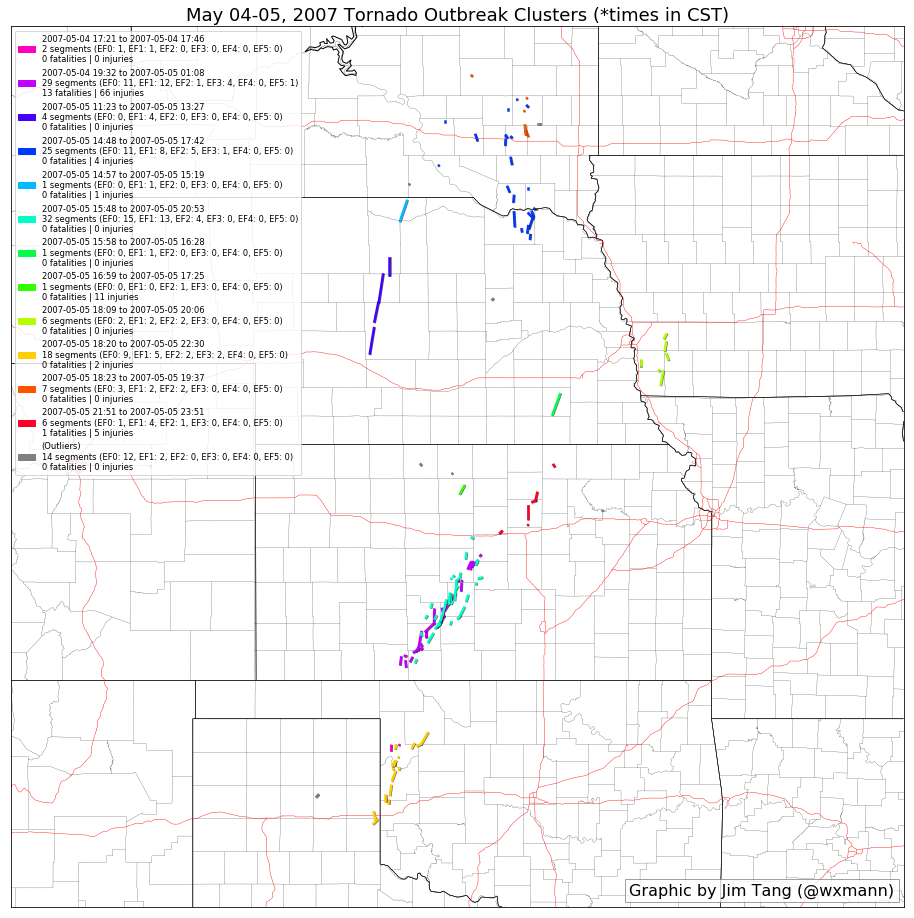

In [31]:
bbox = bbox = (-106, -91.5, 34, 45)
fig = plt.figure(figsize=(16, 20))
basemap = plot_cluster_day(may04_07_clusts, bbox, ctable='gist_rainbow_r',
                          legend=LegendBuilder(loc=2, ncol=1, fontsize='small'))

bottom_right_textbox(plt.gca(), 'Graphic by Jim Tang (@wxmann)')
plt.title('May 04-05, 2007 Tornado Outbreak Clusters (*times in CST)', fontsize=18)

In [37]:
mar28_07 = stormevents.filter_on_date(df, '2007-03-28')
mar28_07_clusts = st_clusters(mar28_07, eps_km=80, eps_min=60, min_samples=15)

Text(0.5,1,'Mar 28, 2007 Tornado Outbreak Clusters (*times in CST)')

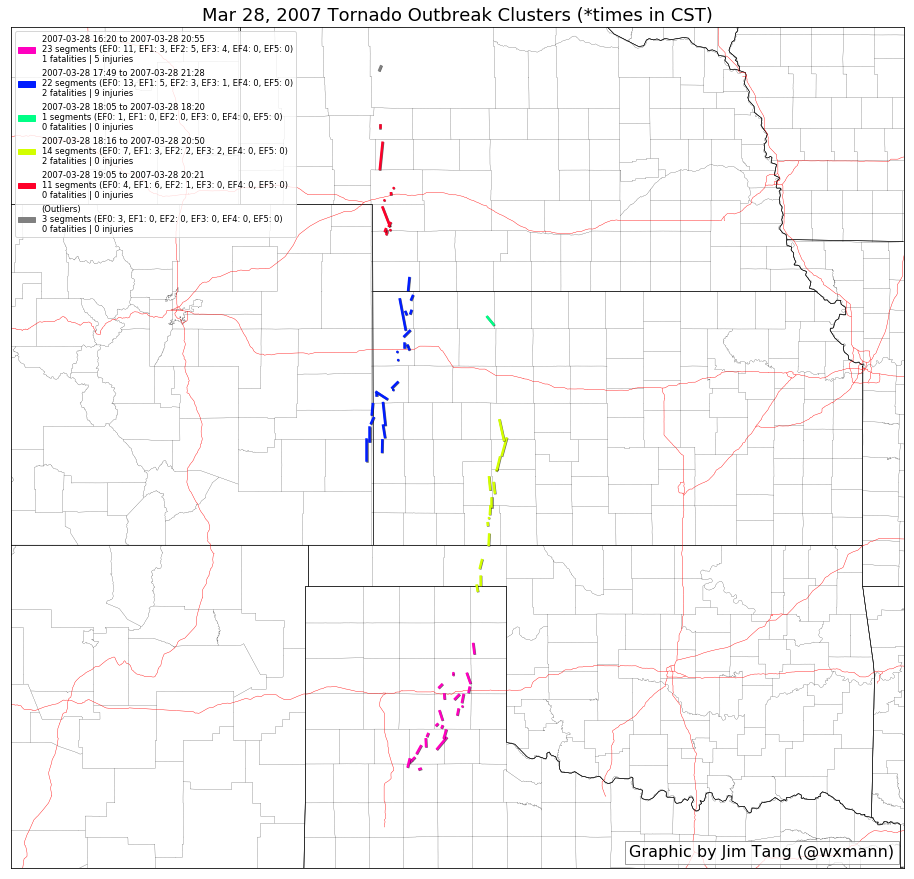

In [39]:
bbox = bbox = (-107.5, -94, 33, 43)
fig = plt.figure(figsize=(16, 20))
basemap = plot_cluster_day(mar28_07_clusts, bbox, ctable='gist_rainbow_r',
                          legend=LegendBuilder(loc=2, ncol=1, fontsize='small'))

bottom_right_textbox(plt.gca(), 'Graphic by Jim Tang (@wxmann)')
plt.title('Mar 28, 2007 Tornado Outbreak Clusters (*times in CST)', fontsize=18)